# 房价预测 - 探索性数据分析 (EDA)

本 Notebook 用于数据探索、可视化及生成示例数据。

In [6]:
import sys
from pathlib import Path

# 添加项目根目录到路径
sys.path.insert(0, str(Path.cwd().parent))

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")
%matplotlib inline

## 1. 加载数据

In [ ]:
data_dir = Path("../data/raw")
train_path = data_dir / "train.csv"

if train_path.exists():
    df = pd.read_csv(train_path)
    print(f"数据形状: {df.shape}")
    display(df.head())
else:
    print("未找到 train.csv，生成示例数据...")

## 2. 生成示例数据（若无真实数据）

In [ ]:
if not train_path.exists():
    np.random.seed(42)
    n = 1000
    df = pd.DataFrame({
        "area": np.random.uniform(50, 200, n),
        "rooms": np.random.randint(1, 6, n),
        "age": np.random.randint(0, 50, n),
        "price": 100 + 0.5 * np.random.uniform(50, 200, n) * 1000 \
                 + 20 * np.random.randint(1, 6, n) * 1000 \
                 - 0.5 * np.random.randint(0, 50, n) * 1000 \
                 + np.random.randn(n) * 50000,
    })
    df["price"] = df["price"].clip(lower=50000)
    data_dir.mkdir(parents=True, exist_ok=True)
    df.to_csv(train_path, index=False)
    print(f"已生成示例数据: {df.shape}")
    display(df.head())

## 3. 基本统计与缺失值

In [4]:
print(df.info())
print("\n缺失值:")
print(df.isnull().sum())
print("\n描述统计:")
display(df.describe())

NameError: name 'df' is not defined

## 4. 可视化

NameError: name 'df' is not defined

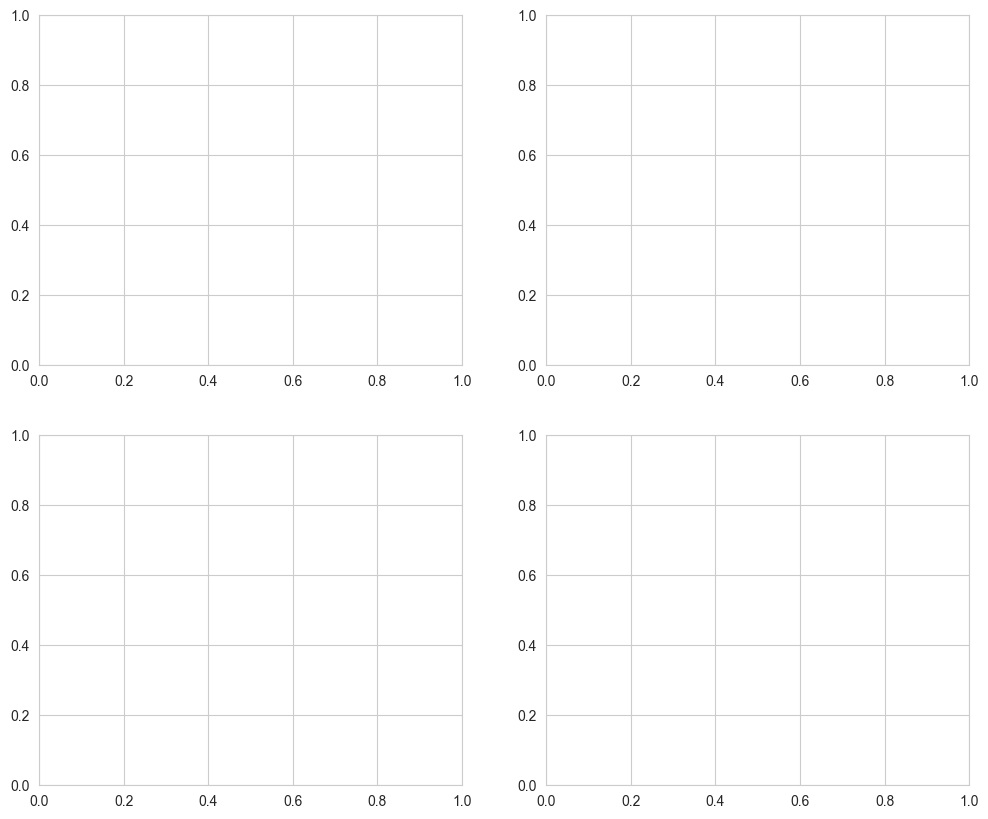

In [7]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# 目标变量分布
sns.histplot(data=df, x="price", kde=True, ax=axes[0, 0])
axes[0, 0].set_title("Price Distribution")

# 面积 vs 价格
sns.scatterplot(data=df, x="area", y="price", ax=axes[0, 1], alpha=0.5)
axes[0, 1].set_title("Area vs Price")

# 房间数 vs 价格
sns.boxplot(data=df, x="rooms", y="price", ax=axes[1, 0])
axes[1, 0].set_title("Rooms vs Price")

# 相关性热力图
sns.heatmap(df.select_dtypes(include=[np.number]).corr(), annot=True, cmap="coolwarm", ax=axes[1, 1])
axes[1, 1].set_title("Correlation Matrix")

plt.tight_layout()
plt.show()

## 5. 结论

In [ ]:
print("EDA 完成。可将 data/raw/train.csv 用于训练。")